# Comments Sentiment

## Step 1. Initialization Step

In [28]:
%matplotlib inline
#include libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import neurolab as nl

# import pybrain as pb
# from pybrain.tools.shortcuts import buildNetwork
# from pybrain.structure import TanhLayer
# from pybrain.datasets import SupervisedDataSet
# from pybrain.supervised.trainers import BackpropTrainer

#SkLearn 
from numpy import linalg
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [29]:
picture_width = 18
picture_height = 5
#
forecast_horizon = 96
planning_horizon_interval = 2
training_set_points = forecast_horizon * planning_horizon_interval
amount_records = 199
amount_training_records = 150
amount_directions = 20

## Step 1.1 Load Data

In [30]:
path_to_data = '/users/tranhieu/Desktop/Bachelor/Data/'
path_to_figures = '/users/tranhieu/Desktop/Bachelor/Data/'

posts = pd.read_csv( path_to_data + 'vector_clustering_positive_200posts.csv', index_col=False, header=None)

load_data = []

for i in range(1):
    load_data[len(load_data):] = [ pd.read_csv( path_to_data + 'vector_clustering_positive_200posts.csv', index_col=False, header=None) ]

# load_data[0].head(amount_records)

## Step 1.2 Explore the time series. Visualising.

In [31]:
# Tesing read data
load_data[0][0:1][1]
# Get list
list_post = [None] * len(load_data[0])
for j in range(len(list_post)):
    list_post[j] = []
    for i in range(1,amount_directions + 1):
        list_post[j].append(load_data[0][j:j+1][i])
# Get vectors from posts data
post_vector = []
for i in range(len(list_post)):
    post_vector.append([])
    for j in range(amount_directions):
        post_vector[i].append(list_post[i][j][i])
# print(post_vector)

# Get training posts and testing posts

In [32]:
training_post_vector = post_vector[:amount_training_records]
testing_post_vector = post_vector[150:]
# print(training_post_vector)
print(len(testing_post_vector))

49


## Draw all plots

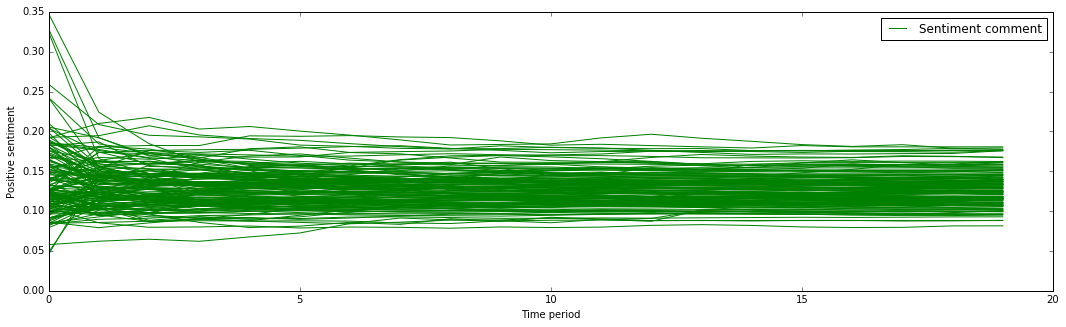

In [33]:
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')
plt.plot(training_post_vector[0], 'g-', label = 'Sentiment comment')
for i in range(1,len(training_post_vector)):
    plt.plot(training_post_vector[i], 'g-')
plt.xlabel('Time period')
plt.ylabel('Positive sentiment')
plt.legend(loc = 'upper right')
plt.savefig(path_to_figures + 'pos_sentiment.png')

## Clustering with K-Means and  MB-Means

False
Silhouette Coefficient (K Means): 0.578
Silhouette Coefficient (MB Means): 0.575


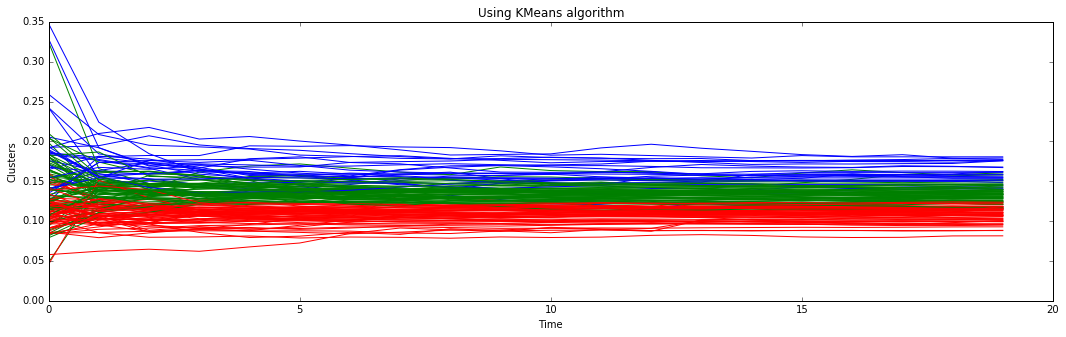

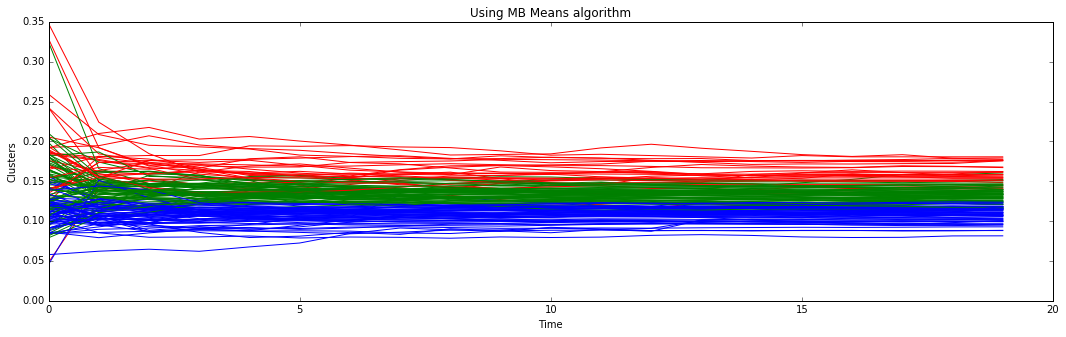

In [34]:
patterns = np.array(training_post_vector)
patterns.shape = (amount_training_records, amount_directions)

#eliminate the masks
mask = np.isnan(patterns)
patterns[mask] = patterns[0][0]

number_of_clusters = len(patterns)

n_clusters_en = 3

pt = patterns[:number_of_clusters:]

#K means
k_means_en = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
t0 = time.time()
k_means_en.fit(pt)
t_batch = time.time() - t0

k_means_labels_en = k_means_en.labels_
k_means_cluster_centers_en = k_means_en.cluster_centers_
k_means_labels_unique_en = np.unique(k_means_labels_en)


#MBK
batch_size = 45
mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters_en, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(pt)
t_mini_batch = time.time() - t0
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)


# Plot result

fig = plt.figure(figsize=(3, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.


print (np.isnan(np.min(post_vector)))

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if k_means_labels_en[i] == 0:
        clr = 'r-'

    if k_means_labels_en[i] == 1:
        clr = 'b-'
        
    if k_means_labels_en[i] == 2:
        clr = 'g-'
        
#     if k_means_labels_en[i] == 3:
#         clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')
plt.title('Using KMeans algorithm')

#MBK
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
clr = 'r'
for i in range(0,len(pt)):
    if mbk_means_labels[i] == 0:
        clr = 'r-'

    if mbk_means_labels[i] == 1:
        clr = 'b-'
        
    if mbk_means_labels[i] == 2:
        clr = 'g-'
        
#     if mbk_means_labels[i] == 3:
#         clr = 'k-'
    plt.plot(pt[i], clr, label = 'Label')    
        
#     plt.plot(pt[i], clr, label = 'Label')    
plt.xlabel('Time')
plt.ylabel('Clusters')
plt.title('Using MB Means algorithm')

print("Silhouette Coefficient (K Means): %0.3f"
      % metrics.silhouette_score(pt, k_means_labels_en, metric='sqeuclidean'))

print("Silhouette Coefficient (MB Means): %0.3f"
      % metrics.silhouette_score(pt, mbk_means_labels, metric='sqeuclidean'))

## Draw separately clusters

62
26
62


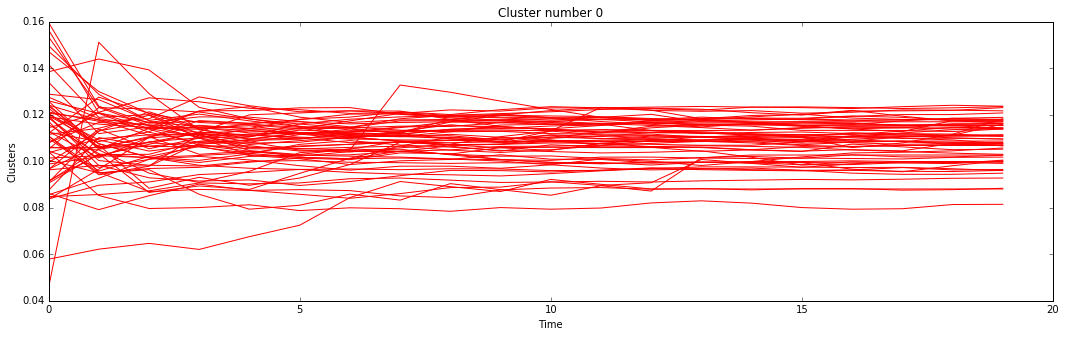

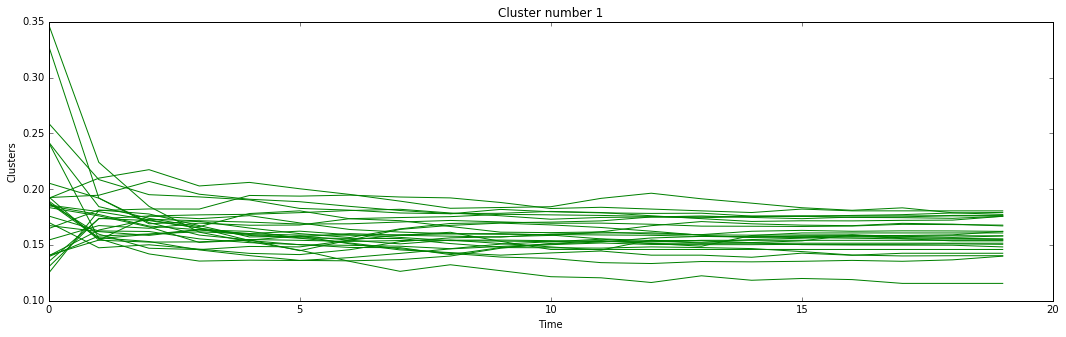

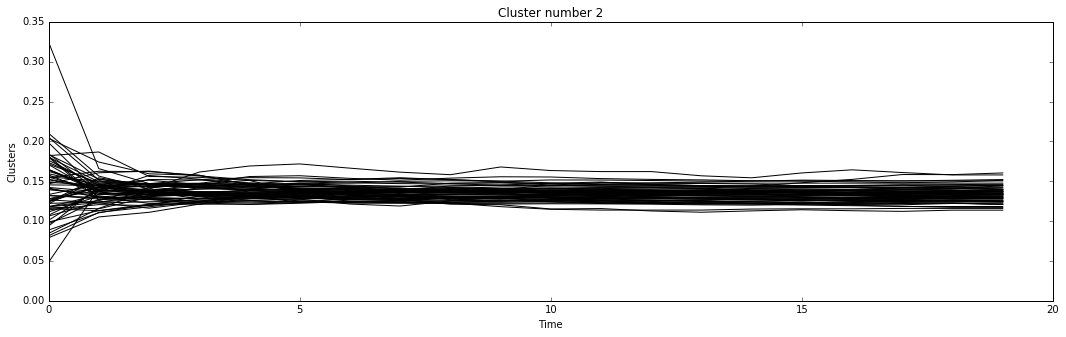

In [35]:
#draw each cluster
numToColor = ['r-', 'g-', 'k-', 'b-', 'y-']
for number_of_cluster in range(n_clusters_en):
    mask= np.where(k_means_labels_en == number_of_cluster)
    pt_0 = pt[mask]

    plt.figure(num=None, figsize=(picture_width, picture_height), dpi=300, facecolor='w', edgecolor='k')
    clr = numToColor[number_of_cluster]
    for i in range(0,len(pt_0)):
        plt.plot(pt_0[i], clr, label = 'Label')    
    plt.xlabel('Time')
    plt.ylabel('Clusters')
    plt.title('Cluster number ' + str(number_of_cluster))
    print(len(pt_0))

## Testing data

Result lables after training : 
[2 2 1 1 0 2 2 0 2 1 2 2 0 2 0 0 2 0 0 2 0 2 0 2 0 2 2 2 1 0 2 0 0 1 2 2 1
 0 0 2 0 1 2 0 1 2 0 2 2 0 0 0 2 2 2 2 0 0 0 2 0 0 0 0 0 2 1 2 2 0 2 2 0 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 2 2 2 2 0 0 0 0 2 2
 2 0 0 0 2 0 2 2 2 2 2 2 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0
 0 2]
center of clusters :
[[ 0.1094      0.11118481  0.11092911  0.11205696  0.1120038 ]
 [ 0.25937778  0.19192222  0.18042222  0.17283333  0.17067778]
 [ 0.15749516  0.15014355  0.14808871  0.14614839  0.14513548]]
label unique:
[0 1 2]
Result Test
[0 2 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0 0 0 0 2
 0 0 0 0 2 0 0 2 2 2 0 0]
Done!


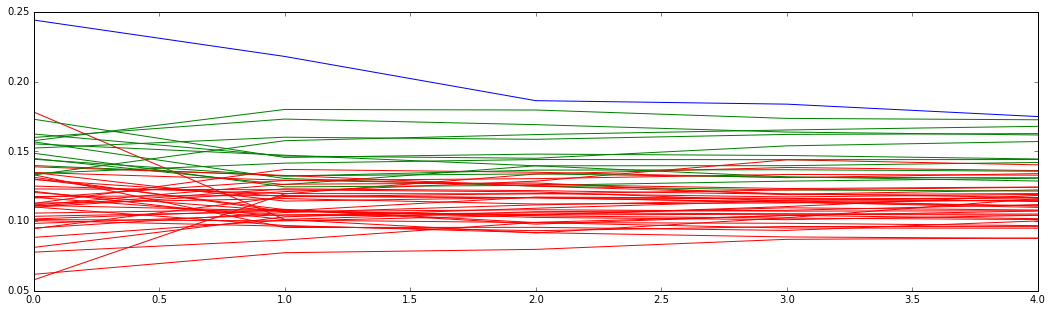

In [36]:
# testing_post_vector -> for testing
# training_post_vector -> for traning
amount_training = 5
patterns_short = []
for i in range(len(training_post_vector)):
    patterns_short.append([])
    for j in range(amount_training):
        patterns_short[i].append(training_post_vector[i][j])
patterns_short = np.array(patterns_short)

patterns_short.shape = (amount_training_records, amount_training)
n_clusters_en = 3

mask = np.isnan(patterns_short)
patterns_short[mask] = patterns_short[0][0]

number_of_clusters = len(patterns_short)

k_means_en = KMeans(init='k-means++', n_clusters=n_clusters_en, n_init=10)
# get begining time
t0 = time.time()

k_means_en.fit(patterns_short)

# count runing time
t_batch = time.time() - t0

k_means_labels_en = k_means_en.labels_
print('Result lables after training : ')
print(k_means_labels_en)

k_means_cluster_centers_en = k_means_en.cluster_centers_
print('center of clusters :')
print(k_means_cluster_centers_en)

k_means_labels_unique_en = np.unique(k_means_labels_en)
print('label unique:')
print(k_means_labels_unique_en)

colors = ['r-', 'b-', 'g-']

# Testing
dataTest = []
for i in range(len(testing_post_vector)):
    dataTest.append([])
    for j in range(amount_training):
        dataTest[i].append(testing_post_vector[i][j])
        
resLabel = k_means_en.predict(dataTest)
print('Result Test')
print(resLabel)

plt.figure(num=None, figsize=(picture_width, picture_height), dpi=1000, facecolor='w', edgecolor='k')    
for i in range(0, len(dataTest)):
    clr = colors[resLabel[i]]
    plt.plot(dataTest[i], clr)    
    
print('Done!')

## Calculate MEA

In [37]:
def find_nearest_id(cluster, index):
    vmin = 2000000000
    nearest_id = -1
    for i in range(len(training_post_vector)):
        if (k_means_labels_en[i] == cluster):
            dist = 0
            for j in range(amount_training):
                dist += abs(training_post_vector[i][j] - testing_post_vector[index][j])
            if vmin > dist:
                vmin = dist
                nearest_id = i
    return nearest_id

def cal_MEA(testId, trainId):
    MAE = 0
    for i in range(amount_training, amount_directions):
        MAE += abs(training_post_vector[trainId][i] - testing_post_vector[testId][i])
    MAE /= (amount_directions - amount_training)
    return MAE
predict_n_real = []
for i in range(len(testing_post_vector)):
    nearest_id = find_nearest_id(resLabel[i], i)
    predict_n_real.append([nearest_id,i])    
    print('>> Test post ', i, ' :')
    print('Nearest index post = ', nearest_id)
    print('MEA  = ', cal_MEA(i, nearest_id), '\n')


>> Test post  0  :
Nearest index post =  114
MEA  =  0.00102666666667 

>> Test post  1  :
Nearest index post =  30
MEA  =  0.0151133333333 

>> Test post  2  :
Nearest index post =  99
MEA  =  0.0014 

>> Test post  3  :
Nearest index post =  20
MEA  =  0.00920666666667 

>> Test post  4  :
Nearest index post =  31
MEA  =  0.00686666666667 

>> Test post  5  :
Nearest index post =  46
MEA  =  0.00347333333333 

>> Test post  6  :
Nearest index post =  64
MEA  =  0.0114733333333 

>> Test post  7  :
Nearest index post =  39
MEA  =  0.00802 

>> Test post  8  :
Nearest index post =  94
MEA  =  0.00888666666667 

>> Test post  9  :
Nearest index post =  32
MEA  =  0.00229333333333 

>> Test post  10  :
Nearest index post =  111
MEA  =  0.0121466666667 

>> Test post  11  :
Nearest index post =  143
MEA  =  0.00593333333333 

>> Test post  12  :
Nearest index post =  148
MEA  =  0.00356666666667 

>> Test post  13  :
Nearest index post =  28
MEA  =  0.00852 

>> Test post  14  :
Nearest i

## Plot of a post and the prediction

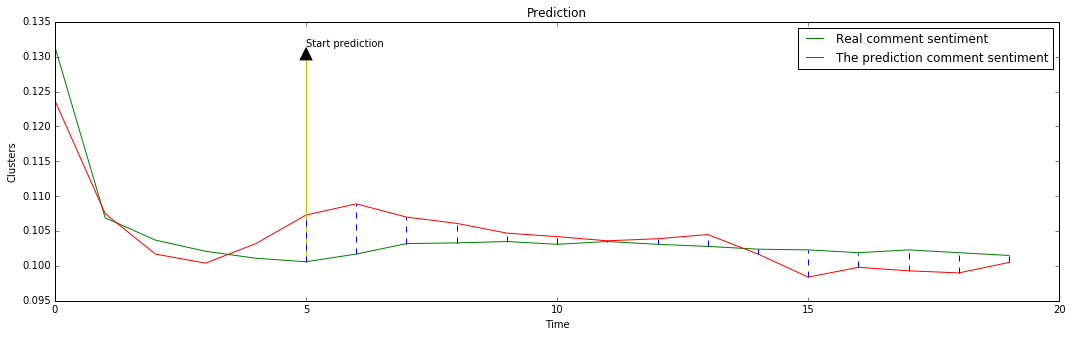

In [82]:

colors = ['r-', 'b-', 'g-']
plt.figure(num=None, figsize=(picture_width, picture_height), dpi=80, facecolor='w', edgecolor='k')

indexPost = 30
for i in range(indexPost,indexPost+1):
    clr_real = 'g-'
    clr_predict = 'r-'
    plt.plot(testing_post_vector[predict_n_real[i][1]], clr_real, label = 'Real comment sentiment')
    plt.plot(training_post_vector[predict_n_real[i][0]], clr, label = 'The prediction comment sentiment')
    ymax = max(testing_post_vector[predict_n_real[i][1]])
    ymin = min(testing_post_vector[predict_n_real[i][1]])
    plt.plot([amount_training, amount_training], [ymin, ymax], 'y-')
    plt.annotate('Start prediction', xy=(amount_training, ymax), xytext=(amount_training, ymax),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
    for j in range(amount_training, amount_directions):
        vlow = min(testing_post_vector[predict_n_real[i][1]][j] , training_post_vector[predict_n_real[i][0]][j])
        vhigh = max(testing_post_vector[predict_n_real[i][1]][j] , training_post_vector[predict_n_real[i][0]][j])
        plt.plot([j, j], [vlow, vhigh], 'b-', linestyle='--')
    

plt.xlabel('Time')
plt.ylabel('Clusters')
plt.title('Prediction')
plt.legend(loc = 'upper right')